# 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout


df = pd.read_csv("data.csv")
df

,Unnamed: 0,Gender,Shift,Injury Location,Age_grouping,scaled_DaysLost,scaled_IncidentCost,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0,1,1,0,1,0.0,1.0000,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0.0,0.9988,0,0,1,0,0,0,0,0,0
2,2,1,0,0,2,1.0,0.9938,0,0,0,0,0,0,1,0,0
3,3,0,0,1,4,0.5,0.9894,0,0,0,0,0,0,1,0,0
4,4,1,0,0,1,0.6,0.9880,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,509,0,1,0,2,0.0,0.0000,0,0,0,0,0,0,1,0,0
468,510,1,1,0,2,0.0,0.0000,0,0,0,0,0,0,0,1,0
469,511,1,1,0,1,0.0,0.0000,0,1,0,0,0,0,0,0,0
470,512,1,1,4,2,0.0,0.0000,0,0,0,0,0,0,1,0,0


# 전처리

In [2]:
df=pd.get_dummies(df, columns = ['Injury Location'])
df

,Unnamed: 0,Gender,Shift,Age_grouping,scaled_DaysLost,scaled_IncidentCost,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle,Injury Location_0,Injury Location_1,Injury Location_2,Injury Location_3,Injury Location_4
0,0,1,1,1,0.0,1.0000,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0.0,0.9988,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2,1,0,2,1.0,0.9938,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,3,0,0,4,0.5,0.9894,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,4,1,0,1,0.6,0.9880,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,509,0,1,2,0.0,0.0000,0,0,0,0,0,0,1,0,0,1,0,0,0,0
468,510,1,1,2,0.0,0.0000,0,0,0,0,0,0,0,1,0,1,0,0,0,0
469,511,1,1,1,0.0,0.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0
470,512,1,1,2,0.0,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [3]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Shift', 'Age_grouping', 'scaled_DaysLost',
       'scaled_IncidentCost', 'Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle', 'Injury Location_0',
       'Injury Location_1', 'Injury Location_2', 'Injury Location_3',
       'Injury Location_4'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

X=df[['scaled_DaysLost', 'Shift','Gender','Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle']].astype(float)
Y = df[[ 'Injury Location_0','Injury Location_1', 'Injury Location_2', 'Injury Location_3',
       'Injury Location_4']].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state =1)
X

,scaled_DaysLost,Shift,Gender,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
469,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 그래프

In [6]:
def Graph(hist):
    import matplotlib.pyplot as plt

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy Trend')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.grid()
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss Trend')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='best')
    plt.grid()
    plt.show()

# 실험

In [7]:
#1-1 Dense-Dense
model1_1 = Sequential()
model1_1.add(Dense(256, input_dim = 12, activation = 'relu'))
model1_1.add(Dense(256, activation = 'relu'))
model1_1.add(Dense(5, activation = 'softmax'))
model1_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist1_1= model1_1.fit(X_train,y_train, batch_size = 2, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
189/189 [==============================] - 3s 7ms/step - loss: 1.6275 - accuracy: 0.2228 - val_loss: 1.5644 - val_accuracy: 0.3053
Epoch 2/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5932 - accuracy: 0.2679 - val_loss: 1.5663 - val_accuracy: 0.2947
Epoch 3/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5543 - accuracy: 0.2759 - val_loss: 1.5800 - val_accuracy: 0.2316
Epoch 4/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5514 - accuracy: 0.2785 - val_loss: 1.5650 - val_accuracy: 0.2947
Epoch 5/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5283 - accuracy: 0.2944 - val_loss: 1.5916 - val_accuracy: 0.2526
Epoch 6/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5168 - accuracy: 0.3077 - val_loss: 1.5803 - val_accuracy: 0.2842
Epoch 7/30
189/189 [==============================] - 1s 5ms/step - loss: 1.4995 - accuracy: 0.3024 - val_loss: 1.6264 - val_accuracy: 0.2737
Epoch 

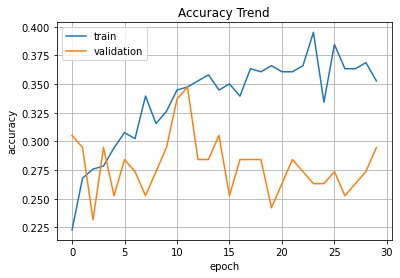

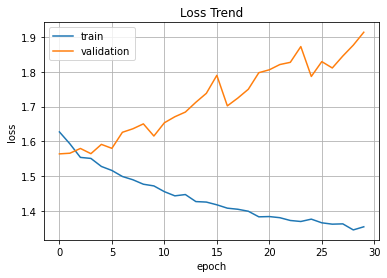

In [8]:
Graph(hist1_1)

In [ ]:
#1-2 Dense-Dense-Dropout
model1_2 = Sequential()
model1_2.add(Dense(256, input_dim = 12, activation = 'relu'))
model1_2.add(Dense(256, activation = 'relu'))
model1_2.add(Dropout(0.5))
model1_2.add(Dense(5, activation = 'softmax'))
model1_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist1_2 = model1_2.fit(X_train,y_train, batch_size = 2, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
189/189 [==============================] - 2s 9ms/step - loss: 1.6291 - accuracy: 0.2255 - val_loss: 1.5861 - val_accuracy: 0.2947
Epoch 2/30
189/189 [==============================] - 2s 9ms/step - loss: 1.6009 - accuracy: 0.2626 - val_loss: 1.6010 - val_accuracy: 0.2526
Epoch 3/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5925 - accuracy: 0.2520 - val_loss: 1.5922 - val_accuracy: 0.2737
Epoch 4/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5676 - accuracy: 0.2679 - val_loss: 1.5762 - val_accuracy: 0.3263
Epoch 5/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5632 - accuracy: 0.2865 - val_loss: 1.5733 - val_accuracy: 0.2947
Epoch 6/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5308 - accuracy: 0.2997 - val_loss: 1.6126 - val_accuracy: 0.2632
Epoch 7/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5416 - accuracy: 0.2812 - val_loss: 1.5919 - val_accuracy: 0.2632
Epoch 

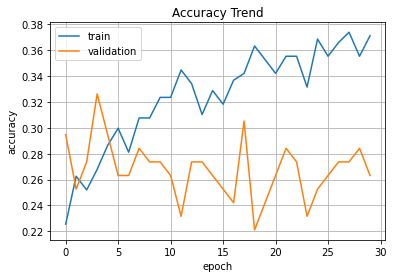

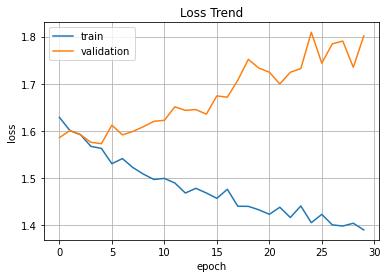

In [ ]:
Graph(hist1_2)

In [ ]:
#1-3 Dense
model1_3 = Sequential()
model1_3.add(Dense(256, input_dim = 12, activation = 'relu'))
model1_3.add(Dense(5, activation = 'softmax'))
model1_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist1_3 = model1_3.fit(X_train,y_train, batch_size = 2, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
189/189 [==============================] - 2s 9ms/step - loss: 1.6213 - accuracy: 0.2202 - val_loss: 1.5930 - val_accuracy: 0.2632
Epoch 2/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5965 - accuracy: 0.2493 - val_loss: 1.5791 - val_accuracy: 0.2842
Epoch 3/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5802 - accuracy: 0.2759 - val_loss: 1.5925 - val_accuracy: 0.2737
Epoch 4/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5713 - accuracy: 0.2865 - val_loss: 1.5746 - val_accuracy: 0.2947
Epoch 5/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5605 - accuracy: 0.3024 - val_loss: 1.5779 - val_accuracy: 0.3053
Epoch 6/30
189/189 [==============================] - 1s 8ms/step - loss: 1.5549 - accuracy: 0.3024 - val_loss: 1.5844 - val_accuracy: 0.2526
Epoch 7/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5433 - accuracy: 0.3263 - val_loss: 1.5738 - val_accuracy: 0.2842
Epoch 

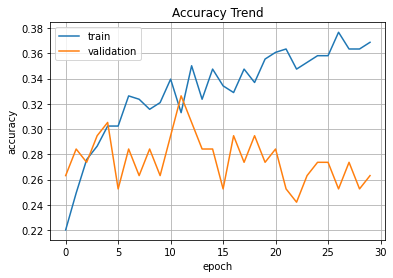

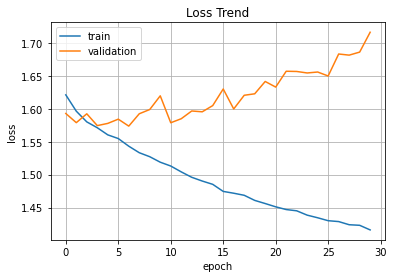

In [ ]:
Graph(hist1_3)

In [ ]:
#1-4 Dense-Dropout
model1_4 = Sequential()
model1_4.add(Dense(256, input_dim = 12, activation = 'relu'))
model1_4.add(Dropout(0.5))
model1_4.add(Dense(5, activation = 'softmax'))
model1_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist1_4 = model1_4.fit(X_train,y_train, batch_size = 2, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
189/189 [==============================] - 2s 7ms/step - loss: 1.6256 - accuracy: 0.1989 - val_loss: 1.6004 - val_accuracy: 0.2526
Epoch 2/30
189/189 [==============================] - 1s 6ms/step - loss: 1.6062 - accuracy: 0.2308 - val_loss: 1.5987 - val_accuracy: 0.2737
Epoch 3/30
189/189 [==============================] - 1s 5ms/step - loss: 1.5882 - accuracy: 0.2546 - val_loss: 1.5959 - val_accuracy: 0.2842
Epoch 4/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5878 - accuracy: 0.2414 - val_loss: 1.5893 - val_accuracy: 0.2737
Epoch 5/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5791 - accuracy: 0.2759 - val_loss: 1.5867 - val_accuracy: 0.2842
Epoch 6/30
189/189 [==============================] - 1s 7ms/step - loss: 1.5620 - accuracy: 0.2599 - val_loss: 1.5695 - val_accuracy: 0.2842
Epoch 7/30
189/189 [==============================] - 1s 6ms/step - loss: 1.5531 - accuracy: 0.2971 - val_loss: 1.5823 - val_accuracy: 0.2632
Epoch 

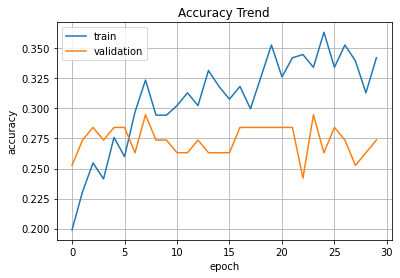

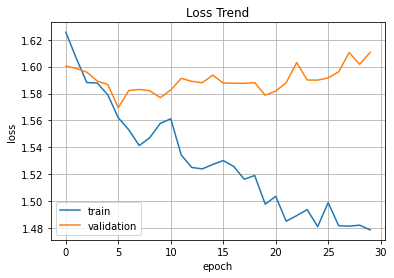

In [ ]:
Graph(hist1_4)

In [ ]:
#2-1 batch_size 1
model2_1 = Sequential()
model2_1.add(Dense(256, input_dim = 12, activation = 'relu'))
model2_1.add(Dropout(0.5))
model2_1.add(Dense(5, activation = 'softmax'))
model2_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist2_1= model2_1.fit(X_train,y_train, batch_size = 1, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
377/377 [==============================] - 3s 6ms/step - loss: 1.6295 - accuracy: 0.2228 - val_loss: 1.5887 - val_accuracy: 0.3053
Epoch 2/30
377/377 [==============================] - 3s 8ms/step - loss: 1.6055 - accuracy: 0.2361 - val_loss: 1.5793 - val_accuracy: 0.2842
Epoch 3/30
377/377 [==============================] - 2s 5ms/step - loss: 1.6015 - accuracy: 0.2361 - val_loss: 1.5832 - val_accuracy: 0.2737
Epoch 4/30
377/377 [==============================] - 1s 4ms/step - loss: 1.5758 - accuracy: 0.2944 - val_loss: 1.5804 - val_accuracy: 0.3053
Epoch 5/30
377/377 [==============================] - 1s 4ms/step - loss: 1.5760 - accuracy: 0.2865 - val_loss: 1.6007 - val_accuracy: 0.2947
Epoch 6/30
377/377 [==============================] - 2s 5ms/step - loss: 1.5598 - accuracy: 0.3024 - val_loss: 1.5936 - val_accuracy: 0.2737
Epoch 7/30
377/377 [==============================] - 2s 5ms/step - loss: 1.5594 - accuracy: 0.3024 - val_loss: 1.5892 - val_accuracy: 0.2632
Epoch 

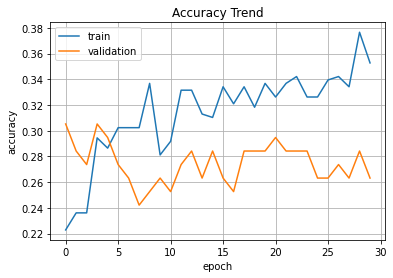

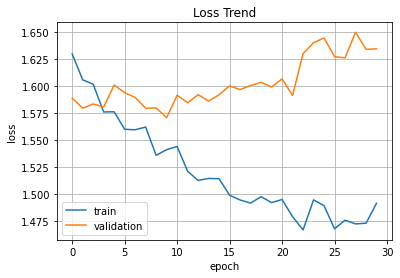

In [ ]:
Graph(hist2_1)

In [ ]:
#2-2 batch_size 4
model2_2 = Sequential()
model2_2.add(Dense(256, input_dim = 12, activation = 'relu'))
model2_2.add(Dropout(0.5))
model2_2.add(Dense(5, activation = 'softmax'))
model2_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist2_2 = model2_2.fit(X_train,y_train, batch_size = 4, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
95/95 [==============================] - 1s 8ms/step - loss: 1.6253 - accuracy: 0.2042 - val_loss: 1.5835 - val_accuracy: 0.3053
Epoch 2/30
95/95 [==============================] - 1s 7ms/step - loss: 1.5931 - accuracy: 0.2546 - val_loss: 1.5890 - val_accuracy: 0.3053
Epoch 3/30
95/95 [==============================] - 1s 7ms/step - loss: 1.5998 - accuracy: 0.2653 - val_loss: 1.5837 - val_accuracy: 0.2842
Epoch 4/30
95/95 [==============================] - 1s 7ms/step - loss: 1.5771 - accuracy: 0.2706 - val_loss: 1.5852 - val_accuracy: 0.2737
Epoch 5/30
95/95 [==============================] - 1s 7ms/step - loss: 1.5697 - accuracy: 0.2891 - val_loss: 1.5870 - val_accuracy: 0.2842
Epoch 6/30
95/95 [==============================] - 1s 8ms/step - loss: 1.5684 - accuracy: 0.2918 - val_loss: 1.5861 - val_accuracy: 0.2842
Epoch 7/30
95/95 [==============================] - 1s 6ms/step - loss: 1.5489 - accuracy: 0.2971 - val_loss: 1.5824 - val_accuracy: 0.2842
Epoch 8/30
95/95 [==

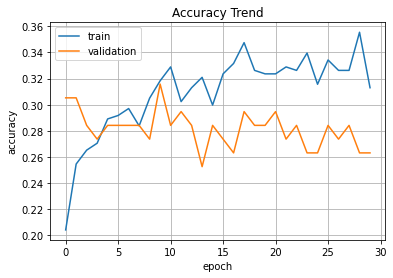

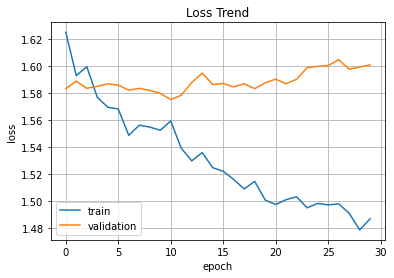

In [ ]:
Graph(hist2_2)

In [ ]:
#2-3 batch_size 8
model2_3 = Sequential()
model2_3.add(Dense(256, input_dim = 12, activation = 'relu'))
model2_3.add(Dropout(0.5))
model2_3.add(Dense(5, activation = 'softmax'))
model2_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist2_3 = model2_3.fit(X_train,y_train, batch_size = 8, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
48/48 [==============================] - 1s 14ms/step - loss: 1.6239 - accuracy: 0.2095 - val_loss: 1.6008 - val_accuracy: 0.2632
Epoch 2/30
48/48 [==============================] - 0s 10ms/step - loss: 1.6007 - accuracy: 0.2732 - val_loss: 1.5856 - val_accuracy: 0.2842
Epoch 3/30
48/48 [==============================] - 1s 11ms/step - loss: 1.5941 - accuracy: 0.2520 - val_loss: 1.5951 - val_accuracy: 0.2842
Epoch 4/30
48/48 [==============================] - 1s 13ms/step - loss: 1.5779 - accuracy: 0.2971 - val_loss: 1.5865 - val_accuracy: 0.2632
Epoch 5/30
48/48 [==============================] - 1s 14ms/step - loss: 1.5774 - accuracy: 0.2759 - val_loss: 1.5854 - val_accuracy: 0.2632
Epoch 6/30
48/48 [==============================] - 1s 11ms/step - loss: 1.5710 - accuracy: 0.2891 - val_loss: 1.5822 - val_accuracy: 0.2842
Epoch 7/30
48/48 [==============================] - 0s 9ms/step - loss: 1.5644 - accuracy: 0.2918 - val_loss: 1.5868 - val_accuracy: 0.2842
Epoch 8/30
48/

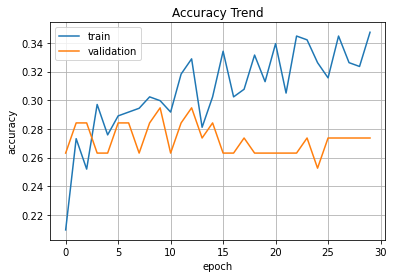

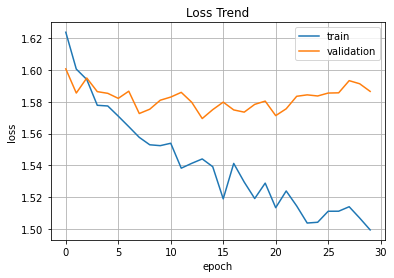

In [ ]:
Graph(hist2_3)

In [ ]:
#2-4 batch_size 16
model2_4 = Sequential()
model2_4.add(Dense(256, input_dim = 12, activation = 'relu'))
model2_4.add(Dropout(0.5))
model2_4.add(Dense(5, activation = 'softmax'))
model2_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist2_4 = model2_4.fit(X_train,y_train, batch_size = 16, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
24/24 [==============================] - 1s 17ms/step - loss: 1.6012 - accuracy: 0.2334 - val_loss: 1.6031 - val_accuracy: 0.2842
Epoch 2/30
24/24 [==============================] - 0s 19ms/step - loss: 1.6045 - accuracy: 0.2493 - val_loss: 1.5863 - val_accuracy: 0.3053
Epoch 3/30
24/24 [==============================] - 0s 17ms/step - loss: 1.5816 - accuracy: 0.2706 - val_loss: 1.5864 - val_accuracy: 0.3053
Epoch 4/30
24/24 [==============================] - 0s 6ms/step - loss: 1.5777 - accuracy: 0.2865 - val_loss: 1.5791 - val_accuracy: 0.2947
Epoch 5/30
24/24 [==============================] - 0s 8ms/step - loss: 1.5690 - accuracy: 0.2865 - val_loss: 1.5818 - val_accuracy: 0.2947
Epoch 6/30
24/24 [==============================] - 0s 11ms/step - loss: 1.5745 - accuracy: 0.2679 - val_loss: 1.5827 - val_accuracy: 0.3158
Epoch 7/30
24/24 [==============================] - 0s 10ms/step - loss: 1.5759 - accuracy: 0.3103 - val_loss: 1.5802 - val_accuracy: 0.2947
Epoch 8/30
24/2

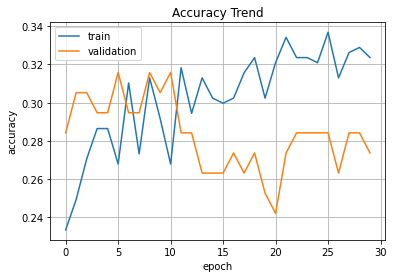

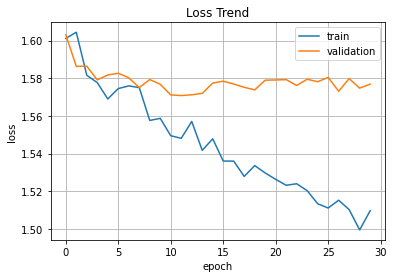

In [ ]:
Graph(hist2_4)

In [ ]:
#2-5 batch_size 32
model2_5 = Sequential()
model2_5.add(Dense(256, input_dim = 12, activation = 'relu'))
model2_5.add(Dropout(0.5))
model2_5.add(Dense(5, activation = 'softmax'))
model2_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist2_5 = model2_5.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 46ms/step - loss: 1.6305 - accuracy: 0.1883 - val_loss: 1.6045 - val_accuracy: 0.2105
Epoch 2/30
12/12 [==============================] - 0s 10ms/step - loss: 1.6029 - accuracy: 0.2440 - val_loss: 1.5951 - val_accuracy: 0.3158
Epoch 3/30
12/12 [==============================] - 0s 15ms/step - loss: 1.5924 - accuracy: 0.2599 - val_loss: 1.5880 - val_accuracy: 0.2947
Epoch 4/30
12/12 [==============================] - 0s 16ms/step - loss: 1.5953 - accuracy: 0.2599 - val_loss: 1.5859 - val_accuracy: 0.2947
Epoch 5/30
12/12 [==============================] - 0s 10ms/step - loss: 1.5896 - accuracy: 0.2865 - val_loss: 1.5850 - val_accuracy: 0.2947
Epoch 6/30
12/12 [==============================] - 0s 12ms/step - loss: 1.5822 - accuracy: 0.2599 - val_loss: 1.5841 - val_accuracy: 0.2947
Epoch 7/30
12/12 [==============================] - 0s 11ms/step - loss: 1.5796 - accuracy: 0.2785 - val_loss: 1.5858 - val_accuracy: 0.2947
Epoch 8/30
12

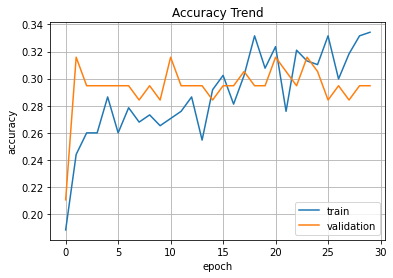

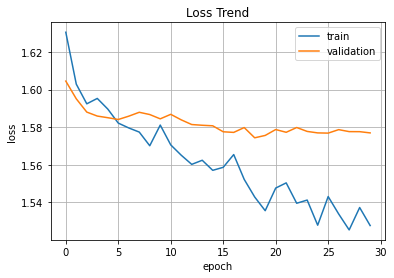

In [ ]:
Graph(hist2_5)

In [ ]:
#3-1 Dense units 512
model3_1 = Sequential()
model3_1.add(Dense(512, input_dim = 12, activation = 'relu'))
model3_1.add(Dropout(0.5))
model3_1.add(Dense(5, activation = 'softmax'))
model3_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist3_1 = model3_1.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 28ms/step - loss: 1.6213 - accuracy: 0.1857 - val_loss: 1.5940 - val_accuracy: 0.2947
Epoch 2/30
12/12 [==============================] - 0s 13ms/step - loss: 1.6021 - accuracy: 0.2679 - val_loss: 1.5871 - val_accuracy: 0.3053
Epoch 3/30
12/12 [==============================] - 0s 15ms/step - loss: 1.5794 - accuracy: 0.2732 - val_loss: 1.5810 - val_accuracy: 0.3053
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 1.5798 - accuracy: 0.2865 - val_loss: 1.5773 - val_accuracy: 0.2947
Epoch 5/30
12/12 [==============================] - 0s 14ms/step - loss: 1.5741 - accuracy: 0.2759 - val_loss: 1.5757 - val_accuracy: 0.2947
Epoch 6/30
12/12 [==============================] - 0s 14ms/step - loss: 1.5759 - accuracy: 0.2891 - val_loss: 1.5739 - val_accuracy: 0.2947
Epoch 7/30
12/12 [==============================] - 0s 10ms/step - loss: 1.5596 - accuracy: 0.2838 - val_loss: 1.5744 - val_accuracy: 0.3053
Epoch 8/30
12

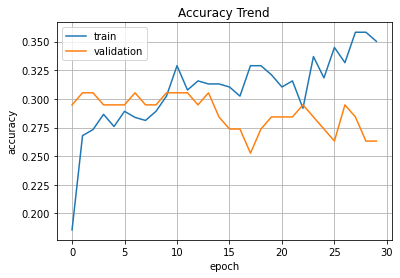

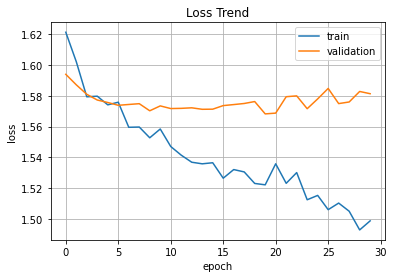

In [ ]:
Graph(hist3_1)

In [ ]:
#3-2 Dense units 1024
model3_2 = Sequential()
model3_2.add(Dense(1024, input_dim = 12, activation = 'relu'))
model3_2.add(Dropout(0.5))
model3_2.add(Dense(5, activation = 'softmax'))
model3_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist3_2 = model3_2.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 19ms/step - loss: 1.6100 - accuracy: 0.2334 - val_loss: 1.5914 - val_accuracy: 0.3053
Epoch 2/30
12/12 [==============================] - 0s 10ms/step - loss: 1.5873 - accuracy: 0.2706 - val_loss: 1.5868 - val_accuracy: 0.2842
Epoch 3/30
12/12 [==============================] - 0s 11ms/step - loss: 1.5840 - accuracy: 0.2706 - val_loss: 1.5830 - val_accuracy: 0.2632
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 1.5742 - accuracy: 0.2706 - val_loss: 1.5847 - val_accuracy: 0.2632
Epoch 5/30
12/12 [==============================] - 0s 13ms/step - loss: 1.5629 - accuracy: 0.2971 - val_loss: 1.5825 - val_accuracy: 0.2737
Epoch 6/30
12/12 [==============================] - 0s 11ms/step - loss: 1.5638 - accuracy: 0.2838 - val_loss: 1.5758 - val_accuracy: 0.2737
Epoch 7/30
12/12 [==============================] - 0s 11ms/step - loss: 1.5507 - accuracy: 0.3210 - val_loss: 1.5793 - val_accuracy: 0.2842
Epoch 8/30
12

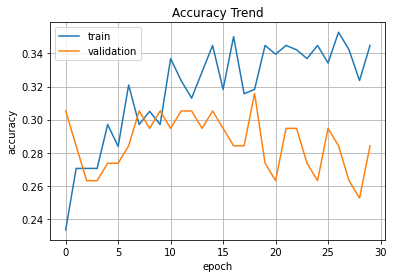

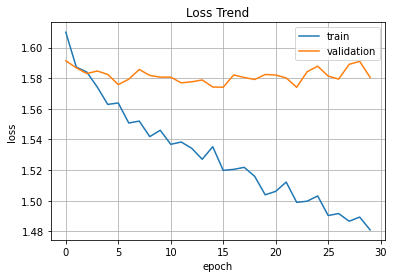

In [ ]:
Graph(hist3_2)

In [ ]:
#3-3 Dense units 128
model3_3 = Sequential()
model3_3.add(Dense(128, input_dim = 12, activation = 'relu'))
model3_3.add(Dropout(0.5))
model3_3.add(Dense(5, activation = 'softmax'))
model3_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist3_3 = model3_3.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 48ms/step - loss: 1.6376 - accuracy: 0.2095 - val_loss: 1.5935 - val_accuracy: 0.3263
Epoch 2/30
12/12 [==============================] - 0s 16ms/step - loss: 1.6225 - accuracy: 0.2069 - val_loss: 1.5885 - val_accuracy: 0.3053
Epoch 3/30
12/12 [==============================] - 0s 12ms/step - loss: 1.6193 - accuracy: 0.2281 - val_loss: 1.5858 - val_accuracy: 0.3053
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 1.6005 - accuracy: 0.2440 - val_loss: 1.5858 - val_accuracy: 0.3053
Epoch 5/30
12/12 [==============================] - 0s 13ms/step - loss: 1.5904 - accuracy: 0.2759 - val_loss: 1.5831 - val_accuracy: 0.3053
Epoch 6/30
12/12 [==============================] - 0s 11ms/step - loss: 1.6016 - accuracy: 0.2706 - val_loss: 1.5809 - val_accuracy: 0.3053
Epoch 7/30
12/12 [==============================] - 0s 10ms/step - loss: 1.5963 - accuracy: 0.2546 - val_loss: 1.5795 - val_accuracy: 0.3053
Epoch 8/30
12

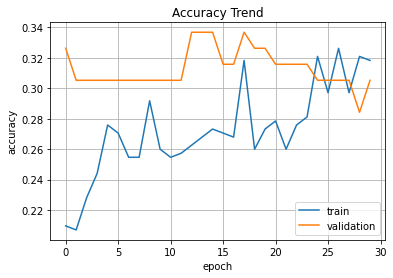

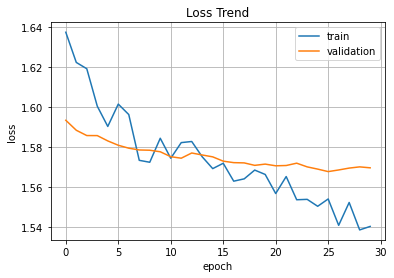

In [ ]:
Graph(hist3_3)

In [ ]:
#4-1 activation fuction leaky_relu
import tensorflow as tf
leaky_relu = tf.nn.leaky_relu
model4_1 = Sequential()
model4_1.add(Dense(256, input_dim = 12, activation = leaky_relu))
model4_1.add(Dropout(0.5))
model4_1.add(Dense(5, activation = 'softmax'))
model4_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist4_1 = model4_1.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 28ms/step - loss: 1.6130 - accuracy: 0.2653 - val_loss: 1.6031 - val_accuracy: 0.2737
Epoch 2/30
12/12 [==============================] - 0s 13ms/step - loss: 1.6058 - accuracy: 0.2706 - val_loss: 1.5964 - val_accuracy: 0.2842
Epoch 3/30
12/12 [==============================] - 0s 13ms/step - loss: 1.6072 - accuracy: 0.2440 - val_loss: 1.5898 - val_accuracy: 0.2842
Epoch 4/30
12/12 [==============================] - 0s 11ms/step - loss: 1.5977 - accuracy: 0.2626 - val_loss: 1.5919 - val_accuracy: 0.2842
Epoch 5/30
12/12 [==============================] - 0s 10ms/step - loss: 1.5878 - accuracy: 0.2679 - val_loss: 1.5912 - val_accuracy: 0.2842
Epoch 6/30
12/12 [==============================] - 0s 10ms/step - loss: 1.5793 - accuracy: 0.2812 - val_loss: 1.5908 - val_accuracy: 0.2842
Epoch 7/30
12/12 [==============================] - 0s 9ms/step - loss: 1.5840 - accuracy: 0.2865 - val_loss: 1.5865 - val_accuracy: 0.2842
Epoch 8/30
12/

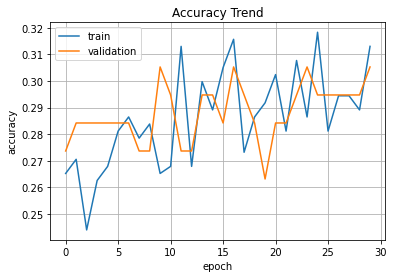

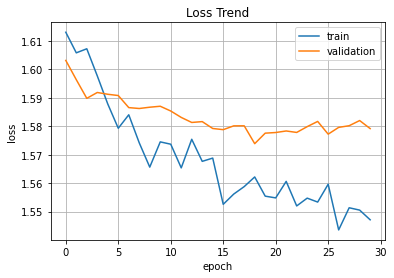

In [ ]:
Graph(hist4_1)

In [ ]:
#4-2 activation function elu
elu = tf.keras.activations.elu
model4_2 = Sequential()
model4_2.add(Dense(256, input_dim = 12, activation = elu))
model4_2.add(Dropout(0.5))
model4_2.add(Dense(5, activation = 'softmax'))
model4_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
hist4_2 = model4_2.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 19ms/step - loss: 1.6345 - accuracy: 0.1963 - val_loss: 1.5950 - val_accuracy: 0.2526
Epoch 2/30
12/12 [==============================] - 0s 8ms/step - loss: 1.6007 - accuracy: 0.2546 - val_loss: 1.5884 - val_accuracy: 0.2632
Epoch 3/30
12/12 [==============================] - 0s 11ms/step - loss: 1.5928 - accuracy: 0.2626 - val_loss: 1.5971 - val_accuracy: 0.2632
Epoch 4/30
12/12 [==============================] - 0s 9ms/step - loss: 1.5973 - accuracy: 0.2679 - val_loss: 1.5927 - val_accuracy: 0.2737
Epoch 5/30
12/12 [==============================] - 0s 10ms/step - loss: 1.5810 - accuracy: 0.2785 - val_loss: 1.5899 - val_accuracy: 0.2842
Epoch 6/30
12/12 [==============================] - 0s 8ms/step - loss: 1.6002 - accuracy: 0.2414 - val_loss: 1.5886 - val_accuracy: 0.2737
Epoch 7/30
12/12 [==============================] - 0s 7ms/step - loss: 1.5743 - accuracy: 0.2838 - val_loss: 1.5918 - val_accuracy: 0.2947
Epoch 8/30
12/12 

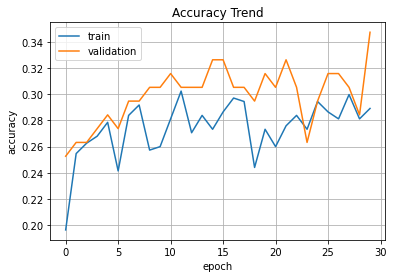

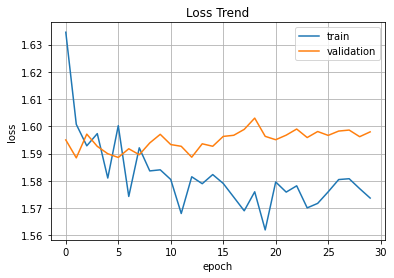

In [ ]:
Graph(hist4_2)

In [ ]:
#5-1 Optimizer SGD
model5_1 = Sequential()
model5_1.add(Dense(256, input_dim = 12, activation = 'relu'))
model5_1.add(Dropout(0.5))
model5_1.add(Dense(5, activation = 'softmax'))
model5_1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics = ['accuracy'])
hist5_1 = model5_1.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 24ms/step - loss: 1.6165 - accuracy: 0.2149 - val_loss: 1.5909 - val_accuracy: 0.2947
Epoch 2/30
12/12 [==============================] - 0s 9ms/step - loss: 1.6210 - accuracy: 0.2149 - val_loss: 1.5894 - val_accuracy: 0.2842
Epoch 3/30
12/12 [==============================] - 0s 11ms/step - loss: 1.6095 - accuracy: 0.2122 - val_loss: 1.5882 - val_accuracy: 0.2737
Epoch 4/30
12/12 [==============================] - 0s 10ms/step - loss: 1.6021 - accuracy: 0.2334 - val_loss: 1.5867 - val_accuracy: 0.3053
Epoch 5/30
12/12 [==============================] - 0s 12ms/step - loss: 1.6156 - accuracy: 0.2149 - val_loss: 1.5861 - val_accuracy: 0.2947
Epoch 6/30
12/12 [==============================] - 0s 9ms/step - loss: 1.6103 - accuracy: 0.2387 - val_loss: 1.5852 - val_accuracy: 0.3053
Epoch 7/30
12/12 [==============================] - 0s 8ms/step - loss: 1.5868 - accuracy: 0.2493 - val_loss: 1.5850 - val_accuracy: 0.3158
Epoch 8/30
12/12

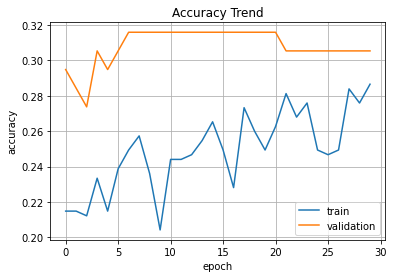

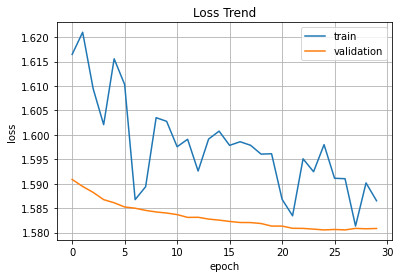

In [ ]:
Graph(hist5_1)

In [13]:
#5-2 Optimizer Nadam

model5_2 = Sequential()
model5_2.add(Dense(256, input_dim = 12, activation = 'relu'))
model5_2.add(Dropout(0.5))
model5_2.add(Dense(5, activation = 'softmax'))
model5_2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics = ['accuracy'])
hist5_2 = model5_2.fit(X_train,y_train, batch_size = 32, epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 1s 20ms/step - loss: 1.6329 - accuracy: 0.1936 - val_loss: 1.6275 - val_accuracy: 0.1895
Epoch 2/30
12/12 [==============================] - 0s 10ms/step - loss: 1.6064 - accuracy: 0.2281 - val_loss: 1.6076 - val_accuracy: 0.3053
Epoch 3/30
12/12 [==============================] - 0s 9ms/step - loss: 1.5964 - accuracy: 0.2599 - val_loss: 1.5978 - val_accuracy: 0.3053
Epoch 4/30
12/12 [==============================] - 0s 9ms/step - loss: 1.5948 - accuracy: 0.2626 - val_loss: 1.5929 - val_accuracy: 0.3053
Epoch 5/30
12/12 [==============================] - 0s 8ms/step - loss: 1.5913 - accuracy: 0.2361 - val_loss: 1.5924 - val_accuracy: 0.2947
Epoch 6/30
12/12 [==============================] - 0s 9ms/step - loss: 1.5710 - accuracy: 0.2891 - val_loss: 1.5884 - val_accuracy: 0.2947
Epoch 7/30
12/12 [==============================] - 0s 12ms/step - loss: 1.5671 - accuracy: 0.2812 - val_loss: 1.5851 - val_accuracy: 0.2947
Epoch 8/30
12/12 

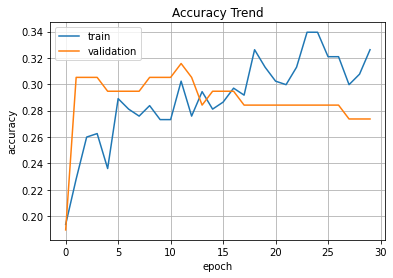

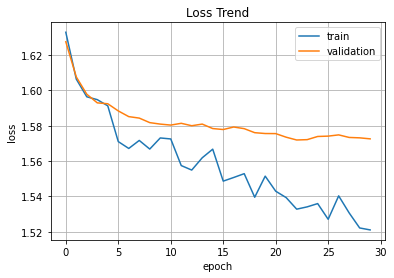

In [14]:
Graph(hist5_2)

# 최종

In [11]:
import keras
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta = 0, patience =10, restore_best_weights=True)

model = Sequential()
model.add(Dense(256, input_dim = 12, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics = ['accuracy'])
hist = model.fit(X_train,y_train, batch_size = 32, epochs = 100, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 1.6157 - accuracy: 0.2308 - val_loss: 1.6038 - val_accuracy: 0.2737
Epoch 2/100
12/12 [==============================] - 0s 16ms/step - loss: 1.6066 - accuracy: 0.2414 - val_loss: 1.5942 - val_accuracy: 0.2737
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 1.5972 - accuracy: 0.2812 - val_loss: 1.5905 - val_accuracy: 0.2737
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 1.5921 - accuracy: 0.2759 - val_loss: 1.5891 - val_accuracy: 0.2842
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 1.5893 - accuracy: 0.2546 - val_loss: 1.5887 - val_accuracy: 0.2737
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 1.5746 - accuracy: 0.2891 - val_loss: 1.5874 - val_accuracy: 0.2737
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 1.5821 - accuracy: 0.2785 - val_loss: 1.5878 - val_accuracy: 0.2737
Epoch 8

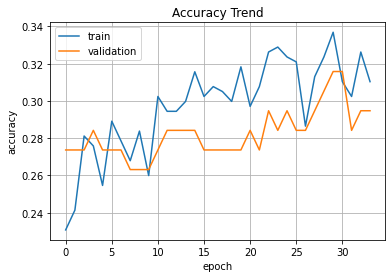

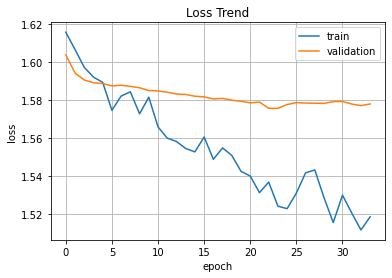

In [12]:
Graph(hist)

In [13]:
#모델 저장

model.save('model.h5')